<a href="https://colab.research.google.com/github/TechnoDexx/DataScience/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D0%BE%D0%B3%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_DS%2C_%D0%B4%D0%B5%D0%BD%D1%8C_2_v3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

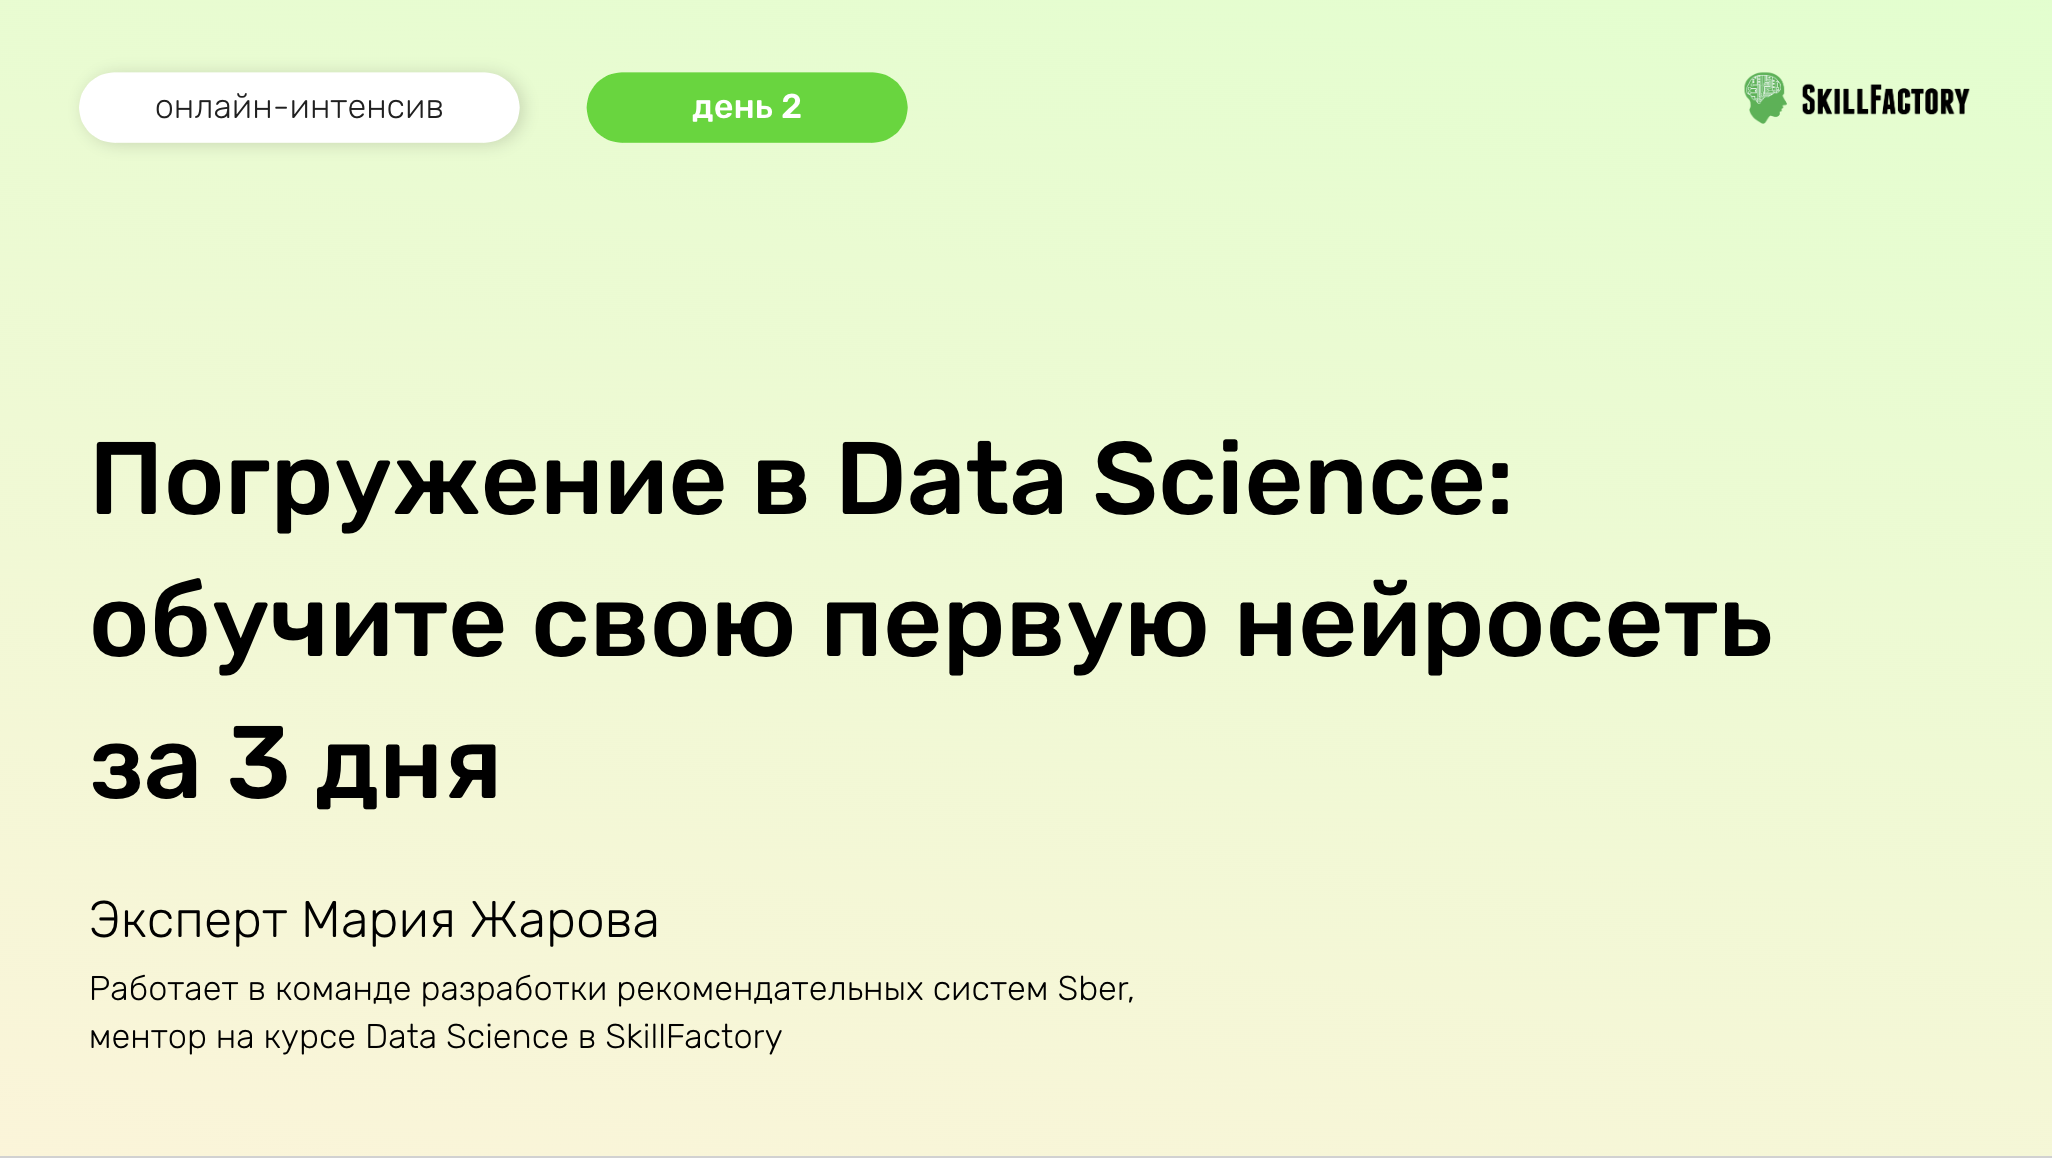

# 🔎 Знакомство с анализом данных

Вспоминаем про переменные :)

Главный объект в аналитике - опять данные. С точки зрения python файл с информацией помещается в переменную, мы называем её определённым именем (в наших примерах будет data) и далее можем с ней работать при помощи средств программирования. Для компьютера это, фактически, адрес в физической памяти на диске, по которому эти данные хранятся.

Для продвинутой обработки данных при помощи python существуют библиотеки - это известный и уже реализованный набор методов и функций. Т.е. для каких-то стандартных операций и преобразований самостоятельно код можно не писать, а воспользоваться его готовой (и эффективной) реализацией из библиотеке.

Первым делом подключим необходимые библиотеки и "положим" наш файл с данными в переменную data:

In [ ]:
# подключение необходимых библиотек
import pandas as pd

In [ ]:
# считываем данные по ссылке
data = pd.read_csv('https://raw.githubusercontent.com/MariaZharova/3-day-intensive/main/Mall_Customers.csv', sep = ',')

Описание колонок в файле:

- CustomerID - id клиента
-	Genre - пол
- Age - возраст
-	Income - сумма покупки
-	Score - оставленная оценка

Теперь файл хранится в data, с ним можно выполнять различные действия (готовые из библиотеки). Эти "действия" называются ***методами***, пишутся через точку после data и обычно имеют логичное соответствующее название на английском.

Давайте посмотрим на основные из них:

In [ ]:
# метод head показывает заданное количество первых строк (head - голова)
data.head(5)

In [ ]:
# посмотрим колонки в нашей файле
data.columns

In [ ]:
# можно также обращаться к определёным колонкам, пример для Income
data.Income.head(5)
# кстати это ещё пример последовательного применения нескольких методов - сначала
# берём нужную колонку, а затем head() выводит из неё только первые 5 строк

In [ ]:
# а этот метод покажет размерность файла
data.shape

In [ ]:
# отсортируем по колонке возраста в порядке убывания
# это пример более сложного метода - теперь в скобках можно указать дополнительные параметры
# здесь можем указать колонку, по которой сортируем (возраст Age)
# и порядок возрастания/убывания (ascening: True/False)
data.sort_values(['Age', 'Income'], ascending=True)

In [ ]:
# нарисуем зависимость выжваемости от возраста
# по горизонтальной оси x указываем возраст
# по вертикальной y выживаемость
data.plot.scatter(x='Age', y='Income')

# 🔎 Что такое машинное обучение и глубокое обучение?

### ⛳ Machine learning и Deep learning – это 2 подмножества искусственного интеллекта:

- ML связан с созданием алгоритмов, которые могут изменять себя без вмешательства человека для получения желаемого результата - путем подачи себя через структурированные данные.
- В DL алгоритмы создаются и функционируют аналогично ML, но устроены они более сложно - существует множество уровней этих алгоритмов, каждый из которых обеспечивает различную интерпретацию данных, которые он передает. Такая сеть алгоритмов называется искусственными нейронными сетями. Простыми словами, это напоминает нейронные связи, которые имеются в человеческом мозге.





### ⛳ Более практическое объяснение работы:

- Имеем табличные данные: назовём колонки-характеристики $x_1,\; x_2\;, ..., x_N$, колонку-ответ $Y$ (на примере того же файла с данными клиентов магазина):

In [ ]:
# в качестве таргета возьмём столбец Score
# т.е. будем предсказывать оценку пользователя по его описанию
data.head(7)

- Цель: написать алгоритм (модель машинного обучения), который бы как можно точнее предсказывал Target, видя только столбцы-характеристики. Например, очень популярный подход - подобрать такие коэффициенты $a_1, a_2, ..., a_N$, чтобы сумма $x_1\cdot a_1 + ... + x_N\cdot a_N$ максимально точно приближала истинный ответ Target (пытаемся вывести закономерности, понять, какие столбцы влияют на итоговый ответ больше всего).

- Для решения таких задач предсказания используются широко известные алгоритмы (модели), которые реализованы в библиотеках Python (например, sklearn). Перейдём к коду и посмотрим на них :)

In [ ]:
# выгрузка ещё части нужных библиотек

# для обработки файлов
import pandas as pd
import numpy as np

# для машинного обучения
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
data.head()

In [ ]:
data.sort_values('Score', ascending=True)

In [ ]:
# сразу сделаем небольшое преобразование - переведём пол из строк в числа
# это нужно для корректной работы моделей,
# т.к. они могут обрабатывать только числовые данные
data.Genre = data.Genre.apply(lambda x: 0 if x == 'Male' else 1)

### Процесс создания, обучения модели и получение результатов

Прежде чем алгоритм сможет давать нам какие-либо предсказания, его нужно "научить" их делать - для этого модель в прямом смысле обучают: показывают ей некоторые объекты (их характеристики) и правильные ответы для них.

Также мы хотим понимать, насколько хорошо работает наш алгоритм - для этого нужен ещё один набор данных с правильными ответами, на которых мы бы уже не обучали алгоритм, но проверяли качество его работы.

Поэтому, нам нужно разделить весь набор данных на два набора:
- Тренировочный набор, на котором мы собираемся тренировать модель
- Тестовый набор, на котором мы будем тестировать нашу модель, чтобы увидеть, насколько точны ее прогнозы



In [ ]:
# выделим для удобства таргет и признаки
X = data.drop('Score', axis = 1) # характеристики
y = data.Score # таргеты (правильные ответы)

In [ ]:
# делим на данные для обучения и для теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Код и алгоритмы большинства известных моделей уже реализованы в библиотеках Python. Можно составить определённую последовательность команд для прохода по всем "жизненным циклам" модели:

1. Создание: здесь просто пишем нужное название
2. Обучение: при помощи метода fit, в аргумент подаются обучающие данные
3. Получение предсказаний: метод predict, в аргументе также подаются данные, на которых мы хотим получить поредсказания обученной модели
4. Оценка: существуют различные меткрики для оценки моделей, прописывается также название метода и в аргументы подаются истинные значения и предсказанные.


In [ ]:
# пример схемы выше
reg = LinearRegression() # 1
reg.fit(X_train, y_train) # 2
y_pred = reg.predict(X_test) # 3
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # 4

print(f"The model performance for testing set") # красивая печать на экран :)
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")

Алгоритмы нейронных сетей более сложные и используют больше параметров, требуют больше места, памяти и ресурсов для работы. В остальном с точки зрения написания кода алгоритм тот же самый: создаём модель -> обучаем -> предсказываем и оцениваем.

### ⛳ Домашнее задание


✅ Задание 1:  Назовите число колонок в файле

In [ ]:
data.shape[1]

✅ Задание 2:  Назовите имя самой первой колонки

In [ ]:
data.columns[0]

✅ Задание 3:  Найдите самую масимальную оценку от пользователя

In [ ]:
data['Score'].max()

✅ Задание 4*: Проверьте, есть ли в данных дубликаты, в ответ напишите "да" или "нет"

Подсказка: попробуйте использовать метод drop_duplicates

In [ ]:
new_data = data.drop_duplicates()
if new_data.shape[0] == data.shape[0]:
  print('нет')
else:
  print('да')

✅ Задание 5: Попробуйте найти в документации ещё какие-нибудь модели из sklearn, и по аналогии с последней ячейкой обучить их на наших данных. Количество моделей неограничено:) В качестве итога можете посчитать метрику score и выбрать наилучшую модель.

Подсказка: можно поменять только название модели в первой строке, весь остальной код будет аналогичным.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn import linear_model
reg2 = linear_model.TheilSenRegressor()

reg2.fit(X_train, y_train) # 2
y_pred2 = reg2.predict(X_test) # 3

rmse2 = (np.sqrt(metrics.mean_squared_error(y_test, y_pred2))) # 4

print(f"The model performance for testing set") # красивая печать на экран :)
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse2}")



✅ Задание 6*: Попробуйте сделать предсказание на своих собственных данных. Можете воспользоваться приведённым шаблоном

In [24]:
import numpy as np      #решила вместо задания с введением своих данных выполнить немножко другое, посложнее, чтобы потренировать свои навыки
                        #по аналогии с примером решила попробовать загрузить другую таблицу с данными и попрактиковаться
                        #с обучением сетки предсказывать одну из колонок таблицы
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

# благодаря интенсиву посмотрела немножко сайт Kaggle и нашла там
data_new = pd.read_csv('/content/train.csv', sep=',')
                                               # кейс с Титаником, оттуда же и взяла данные
data_new.Sex = data_new.Sex.apply(lambda x: 0 if x == 'male' else 1)
data_new['Embarked'] = data_new['Embarked'].replace(['C', 'S', 'Q'], [0, 1, 2])
del data_new['Name']               #убрала те колонки, которые посчитала не совсем релевантными исследованию
del data_new['Ticket']
del data_new['Cabin']
x = data_new.drop('Survived', axis = 1)
y = data_new.Survived

x_trains, x_tests, y_trains, y_tests = train_test_split(x, y, test_size=0.2, random_state=42)

reg = HistGradientBoostingClassifier() # сначала хотела взять другую модель, но из-за обработки
reg.fit(x_trains, y_trains)            # программа предложила мне попробовать эту модель
y_predict = reg.predict(x_tests)

rmse_new = (np.sqrt(metrics.mean_squared_error(y_tests, y_predict)))

my_data = np.array([892, 3, 1, 23, 0, 0, 8, 1]) #теперь вернулась к изначальному заданию и попробовала предсказать, выжила ли бы я
                                                #спойлер: (увы, нет)
y_my = reg.predict(my_data.reshape(1, -1))
print(y_my)

print(f"The model performance for testing set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse_new}")


FileNotFoundError: [Errno 2] No such file or directory: '/home/itshark/Programming/Sources/Python/DataScience/content/train.csv'

PS: Можете подумать, какая колонка является неинформативной с точки зрения обучения (соответственно, её можно удалить:))

# 🌟 Удачи!
Фидбеки по каждой работе напишем в телеграм-чате

